<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/11Apr20_Regression%20Cost%20Function%20Lab_COMPLETE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cost Function lab

### 1. Reviewing our data

Let's take another look at our restaurant data. Below we have data showing the temperatures and number of restaurant customers over five days.

| temperature        | actual customers           
| ------------- |:-------------:| 
|    80       | 120 | 
|    65        | 100 | 
|    50        | 85 | 
|    70        | 100 | 
|    60        | 90 | 


We then use plotly to plot this data.

In [0]:
import plotly.graph_objects as go
import numpy as np
temperatures = np.array([80, 65, 50, 70, 60])
amounts = np.array([120, 100, 85, 100, 90])
data_trace = go.Scatter(x = temperatures, y = amounts, mode = 'markers')
go.Figure(data = [data_trace])

### 2. Building a model

We start to see that there's an association between temperature and the amount of customers in the restaurant.  It looks like an increase in temperature is associated with an increase in temperature, so we start with the following formula as our machine learning model.

$$ amount\_of\_customers = 1.3 * temperature $$

Now we can use this function to calculate the expected values of our observed data.

In [0]:
expected_customers = temperatures*1.3
expected_customers
# array([104. ,  84.5,  65. ,  91. ,  78. ])

array([104. ,  84.5,  65. ,  91. ,  78. ])

And plot it like so.

In [0]:
data_trace = go.Scatter(x = temperatures, y = amounts, mode = 'markers', name = 'observed')
model_trace = go.Scatter(x = temperatures, y = expected_customers, name = 'expected', mode = 'lines')
layout = {'yaxis': {'title': 'customers'}, 'xaxis': {'title': 'temperature'}}
go.Figure(data = [data_trace, model_trace], layout = layout)

## Do: Evaluate the model

To evaluate the model, let's start by calculating the error, `actual - expected`, at each point.

| temperature   | actual customers | expected customers| error | 
| ------------- |:-------------:   |:-----------------:|:-----:| 
|    80         | 120              | 104               | ?     |
|    65         | 100              | 84.5              | ?     |
|    50         | 85               | 65                | 15    |
|    70         | 100              | 91                | 9     |
|    60         | 90               | 78                | 12    |


In [0]:
error_day_1

-24.0

In [0]:
error_day_1 = temperatures[0] - expected_customers[0]

In [0]:
error_day_2 = temperatures[1] - expected_customers[1]

In [0]:
error_day_2

-19.5

Ok, now it we should even be able to write a function that calculates the error at each point.

In [0]:
def error(actual, expected):
    return actual - expected

In [0]:
error(120, 104)
# 16

16

Next calculate the errors at each point using numpy.

In [0]:
errors = amounts-expected_customers
errors
# [16.0, 15.5, 20.0, 9.0, 12.0]

array([16. , 15.5, 20. ,  9. , 12. ])

And write a function called `calculated_errors` that returns the same result using Python (no numpy).

In [0]:
def calculated_errors(amounts, predicted_amounts):
    return amounts-predicted_amounts

In [0]:
calculated_errors(amounts, expected_customers)
# [16.0, 15.5, 20.0, 9.0, 12.0]

array([16. , 15.5, 20. ,  9. , 12. ])

Now let's add our errors to our plotly traces.

> We can do so by first initializing a dictionary to represent our errors.  

In [0]:
error_lines = dict(type='data', symmetric=False, array=errors)
error_lines

{'array': array([16. , 15.5, 20. ,  9. , 12. ]),
 'symmetric': False,
 'type': 'data'}

Then we pass this dictionary into the `error_y` argument of our model trace.

In [0]:
model_trace = go.Scatter(x = temperatures, y = expected_customers,
                         error_y = error_lines,
                         name = 'expected', mode = 'lines')
go.Figure([data_trace, model_trace], layout = layout)

Now let's calculate the `total_error` purely in Python.  

> This function *is not* RSS, it is simply the errors at each point, summed together.

In [0]:
def total_error(amounts, predicted_amounts):
    return sum(amounts - predicted_amounts)

In [0]:
# LV: I changed the second parameter from predicted_aomounts to expected_customers
total_error(amounts, expected_customers)
# 72.5

72.5

## Moving to Sum of Squared Error

Now our `total_error` metric happens to work fine with the data and model that we have above.  However, if we change our model, we'll see that our positive and negative errors can start to cancel each other out, which is not what we want.

To fix this we decide to use the residual sum of squares (RSS) formula.  Write a function that calculates the RSS for a list of actual data and a list of expected data.  If you forget the RSS formula, you can [find it on Wikipedia](https://en.wikipedia.org/wiki/Residual_sum_of_squares).

> Write this in Python.

In [0]:
def rss(actuals, expecteds):
    return sum(np.square(actuals-expecteds))

In [0]:
rss(amounts, expected_customers)
# 1121.25

1121.25

That was the RSS of our first model.

Let's also calculate this using numpy.

In [0]:
# amounts-expected_customers
rss_np = sum(np.square(amounts-expected_customers))
rss_np
# 1121.25

1121.25

### Bonus Plotting in MatplotLib

First, just plot a scatter plot of the temperatures and amounts.

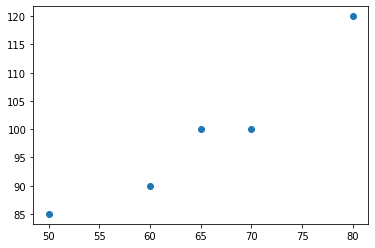

In [0]:
import matplotlib.pyplot as plt
plt.scatter(x = temperatures, y = amounts)

Answer: <img src="https://github.com/jigsawlabs-student/regression-fundamentals/blob/master/7-regression-cost-function-lab/temps-amounts.png?raw=1" width="40%">

Now add in a line plot of our model.  Label the x and y axis accordingly as displayed below.

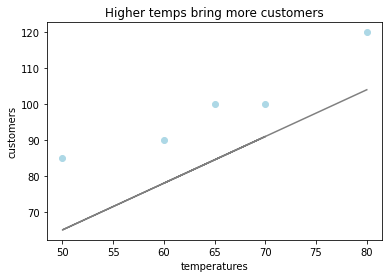

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(temperatures, amounts, color = 'lightblue')
ax.set(xlabel = 'temperatures', ylabel = 'customers', title = 'Higher temps bring more customers')
ax.plot(temperatures, 1.3*temperatures, color = 'gray')

<img src="https://github.com/jigsawlabs-student/regression-fundamentals/blob/master/7-regression-cost-function-lab/labeled-plot.png?raw=1" width="40%">

We'll show you how to create a plot with error bars below.

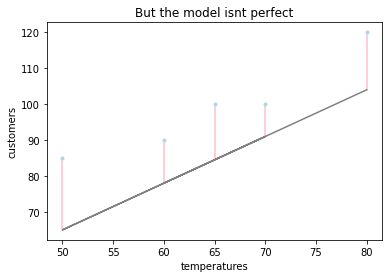

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(temperatures, amounts, 
            marker='.', ls = 'none', ecolor = 'pink',
            yerr = [0*temperatures, 1.3*temperatures - amounts], color = 'lightblue'
           )
ax.set(xlabel = 'temperatures', ylabel = 'customers', title = 'But the model isnt perfect')
ax.plot(temperatures, 1.3*temperatures, color = 'gray')

Take a look at the errorbar code.

In [0]:
ax.errorbar(temperatures, amounts, 
            marker='.', ls = 'none', ecolor = 'pink',
            yerr = [0*temperatures, 1.3*temperatures - amounts], color = 'lightblue'
           )

<ErrorbarContainer object of 3 artists>

The key part is `yerr`.  It takes a list of zero values, and a list of the errors.

In [0]:
0*temperatures

array([0, 0, 0, 0, 0])

In [0]:
1.3*temperatures - amounts

array([-16. , -15.5, -20. ,  -9. , -12. ])

The zero values are there to indicate the error amount above the markers (zero) to display, and the second list of differences, shows the amount below the markers to display.